<a href="https://colab.research.google.com/github/VasRamesh/chess-cheat-hunter/blob/main/03-kmeans-clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

%matplotlib inline


### Load in data:

In [2]:
import pickle
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
with open('/content/drive/My Drive/acc_data.pkl', 'rb') as f:
  acc_data = pickle.load(f)
  acc_data.reset_index(drop=True, inplace=True) # Fix errors made by threading

In [4]:
#acc_data.info(), acc_data.describe()
acc_data.head()

,w_username,w_accuracy,w_rating,b_username,b_accuracy,b_rating
0,DilePuppa,60.52,1497,---Faniel,77.03,1514
1,---Faniel,70.32,1600,nunosa1965,44.20,1730
2,egor2,74.41,1472,---Faniel,85.31,1614
3,Korabl1,88.21,1612,---Faniel,92.09,1579
4,---Faniel,48.09,1610,ajampana,80.96,1603


### Convert Data into NumPy Array so that we can insert in Kmeans()

In [64]:
del_columns = ['w_username', 'b_username']
ac_data = acc_data.drop(del_columns, axis=1, inplace=False)  # drop username columns

In [65]:
# #TODO: REMOVE
for i in range(len(ac_data)):
  if max(ac_data['w_accuracy'][i], ac_data['b_accuracy'][i]) < 90:
    ac_data.drop(i, axis=0, inplace=True)


data = ac_data.to_numpy()

In [66]:
data[1], data.shape

(array([  98.37, 1769.  ,   96.92, 1618.  ]), (4183, 4))

### Normalize the data

In [76]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
data = scaler.fit_transform(data)

### KMeans clustering w/ Elbow method implementation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

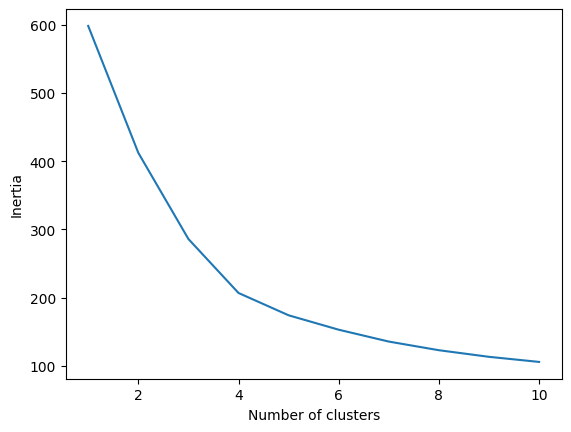

In [77]:
# Create a list to store the inertias
inertias = []

# Iterate over the number of clusters
for k in range(1, 11):
  # Create a KMeans object
  kmeans = KMeans(n_clusters=k)

  # Fit the data to the model
  kmeans.fit(data)

  # Calculate the inertia
  inertia = kmeans.inertia_

  # Store the inertia
  inertias.append(inertia)

# Plot the inertias
plt.plot(range(1, 11), inertias)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()


### View the 4 cluster solution:

In [78]:
# Looks like after 4 clusters, our deviations decrease too slowly
num_clusters = 4
# Create a KMeans object
kmeans = KMeans(n_clusters=num_clusters)

# Fit the data to the model
kmeans.fit(data)

# Predict the cluster labels
labels = kmeans.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Visualize different clusters:

In [79]:
data[0]

array([0.8821    , 0.55071402, 0.9209    , 0.54757497])

In [80]:
cluster1 = pd.DataFrame(columns=['w_acc', 'w_rating', 'b_acc', 'b_rating'])
cluster2 = pd.DataFrame(columns=['w_acc', 'w_rating', 'b_acc', 'b_rating'])
cluster3 = pd.DataFrame(columns=['w_acc', 'w_rating', 'b_acc', 'b_rating'])
cluster4 = pd.DataFrame(columns=['w_acc', 'w_rating', 'b_acc', 'b_rating'])

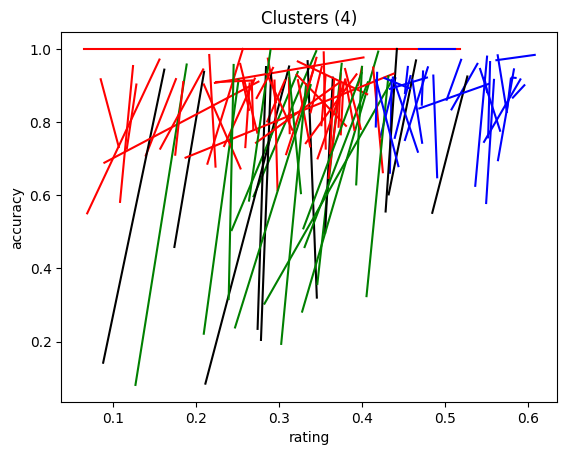

In [81]:
for i in range(100):

  x1 = data[i, 1]  # w_rating
  y1 = data[i, 0]  # w_acc
  x2 = data[i, 3]  # b_rating
  y2 = data[i, 2]  # b_acc
  #entry = {'w_acc': y1, 'w_rating': x1, 'b_acc': y2, 'b_rating': x2}

  if labels[i] == 0:
    plt.plot([x1, x2], [y1, y2], 'r')

  elif labels[i] == 1:
    plt.plot([x1, x2], [y1, y2], 'b')

  elif labels[i] == 2:
    plt.plot([x1, x2], [y1, y2], 'g')

  else:
    plt.plot([x1, x2], [y1, y2], 'k')

plt.title(f"Clusters ({num_clusters})")
plt.xlabel("rating")
plt.ylabel("accuracy")
#plt.axhline(y=88, color='red')
plt.show()

In [ ]:
""" It seems like KMeans() is clustering too heavlity based on rating, although there are good insites (such as r and g (clusters 1 & 3))
aren't in the suspicious range. Let's exclude rating and see how the graph looks"""

In [ ]:
""" Conclusion: using 4 dimensions to plot (w_rating, w_acc) -> (b_rating, b_acc) line yeilded a good clustering of datapoints
only those with a max accuracy score (of the two) greater than 90 were included in the final data set (as low accuracy from both players)
makes cheating very unlikely. KMeans() with Standardized Normalization yeilded 4 clusters:
Cluster 1 = red
Cluster 2 = blue
Cluster 3 = green
Cluster 4 = black
Let's analyze further:
"""

### Final summary of KMeans() Clustering

In [56]:
data[0]

array([0.8821    , 0.55071402, 0.9209    , 0.54757497])

In [ ]:
cluster1 = pd.DataFrame(columns=['w_acc', 'w_rating', 'b_acc', 'b_rating'])
cluster2 = pd.DataFrame(columns=['w_acc', 'w_rating', 'b_acc', 'b_rating'])
cluster3 = pd.DataFrame(columns=['w_acc', 'w_rating', 'b_acc', 'b_rating'])
cluster4 = pd.DataFrame(columns=['w_acc', 'w_rating', 'b_acc', 'b_rating'])

for i in range(len(labels)):
  entry = {'w_acc': data[i, 0], 'w_rating': data[i, 1], 'b_acc': data[i, 2], 'b_rating': data[i, 3]}
  if labels[i] == 0:
    cluster1 = cluster1.append(entry, ignore_index=True)
  elif labels[i] == 1:
    cluster2 = cluster2.append(entry, ignore_index=True)
  elif labels[i] == 2:
    cluster3 = cluster3.append(entry, ignore_index=True)
  else:
    cluster4 = cluster4.append(entry, ignore_index=True)

In [75]:
# Labels and data:
print('SUMMARY: ')
print(f'acc_data length: {len(acc_data)} samples')
print(f'acc_data > 90 length: {len(ac_data)} samples used')

counts = {}
for value in labels:
    if value not in counts:
        counts[value] = 0
    counts[value] += 1

# Print the counts
print(f"Cluster 1 games: {counts[0]}")
print(f"Cluster 2 games: {counts[1]}")
print(f"Cluster 3 games: {counts[2]}")
print(f"Cluster 4 games: {counts[3]}")
print('----------------------------------------')
print('Cluster 1 information: ')
print(cluster1.describe())
print('----------------------------------------')
print('Cluster 2 information: ')
print(cluster2.describe())
print('----------------------------------------')
print('Cluster 3 information: ')
print(cluster3.describe())
print('----------------------------------------')
print('Cluster 4 information: ')
print(cluster4.describe())

SUMMARY: 
acc_data length: 29414 samples
acc_data > 90 length: 4183 samples used
Cluster 1 games: 1544
Cluster 2 games: 1524
Cluster 3 games: 583
Cluster 4 games: 532
----------------------------------------
Cluster 1 information: 
             w_acc     w_rating        b_acc     b_rating
count  1544.000000  1544.000000  1544.000000  1544.000000
mean      0.302185     0.883113     0.323553     0.868184
std       0.477243     0.731387     0.518695     0.721469
min      -2.234493    -1.619650    -2.960359    -1.513218
25%       0.042408     0.375410     0.022698     0.343534
50%       0.467404     0.737930     0.534927     0.749101
75%       0.626657     1.297315     0.693854     1.279089
max       0.885188     3.945390     0.941569     3.853657
----------------------------------------
Cluster 2 information: 
             w_acc     w_rating        b_acc     b_rating
count  1524.000000  1524.000000  1524.000000  1524.000000
mean      0.219521    -0.721649     0.221341    -0.718286
std    

In [ ]:
""" From 29,400 games from 10,000 players, we were able to flag a total of 3066 as suspicious
and need for more review. """